### 데이터 불러오기

In [2]:
import pandas as pd

gdp = pd.read_excel('./1990-2017_한중일_1인당gdp.xlsx')
co2 = pd.read_excel('./1990-2017_한중일_CO2.xlsx')

### 데이터 결합을 위한 형태 변경

In [3]:
gdp_df = pd.melt(gdp,id_vars=['Country Code'])
co2_df = pd.melt(co2,id_vars=['국가별'])

In [4]:
gdp_df.columns = ['country','year','gdp']
co2_df.columns = ['country','year','co2']

### 데이터 결합을 위한 형태 2차 변경

In [5]:
co2_df['country'] = co2_df['country'].str.replace('중국','CHN')
co2_df['country'] = co2_df['country'].str.replace('일본','JPN')
co2_df['country'] = co2_df['country'].str.replace('한국','KOR')
gdp_df['year'] = gdp_df['year'].str[:4]

### 데이터 join

In [6]:
co2_df['country'] = co2_df['country'].str[3:6]
df = co2_df.merge(gdp_df,on=['country','year'])

In [7]:
df

,country,year,co2,gdp
0,KOR,1990,231.8,6610.036508
1,CHN,1990,2122.2,317.884673
2,JPN,1990,1042.3,25359.347020
3,KOR,1991,255.8,7636.982429
4,CHN,1991,2237.1,333.142145
...,...,...,...,...
79,CHN,2016,9109.2,8147.938148
80,JPN,2016,1146.9,38761.818150
81,KOR,2017,600.0,31616.843400
82,CHN,2017,9302.0,8879.438149


### gdp와 co2의 산포도 - 전체 -> 여기는 없애야 할듯,, (한중일 합은 의미 없어보임)

gdp와 co2의 상관계수 :  -0.49


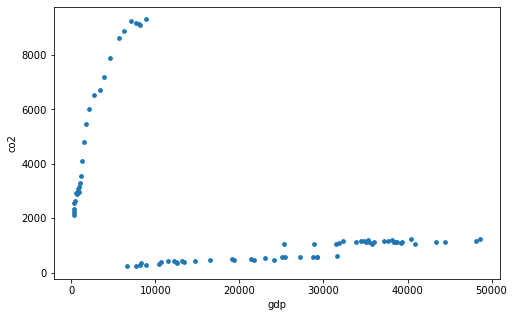

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
df.plot.scatter(x='gdp',
                     y='co2',s=14)

corr_gdp_with_co2 = round(df.corr().iloc[0,1],2)
print('gdp와 co2의 상관계수 : ',corr_gdp_with_co2)

-> 전체 데이터를 보았을 때는 -0.49로 낮은 상관성을 가지고 있음 (국가별 데이터 범위가 다르기때문으로 추정)

### gdp 12년 이동평균 - 전체

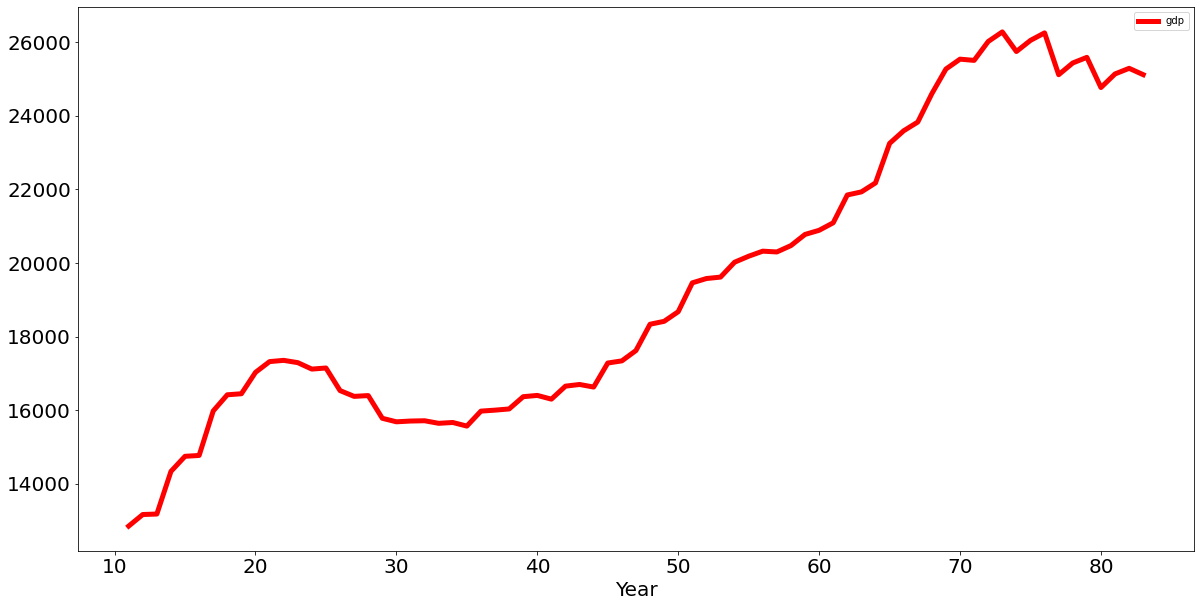

In [9]:
gdp = df[['gdp']]
gdp.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

### co2 12년 이동평균 - 전체

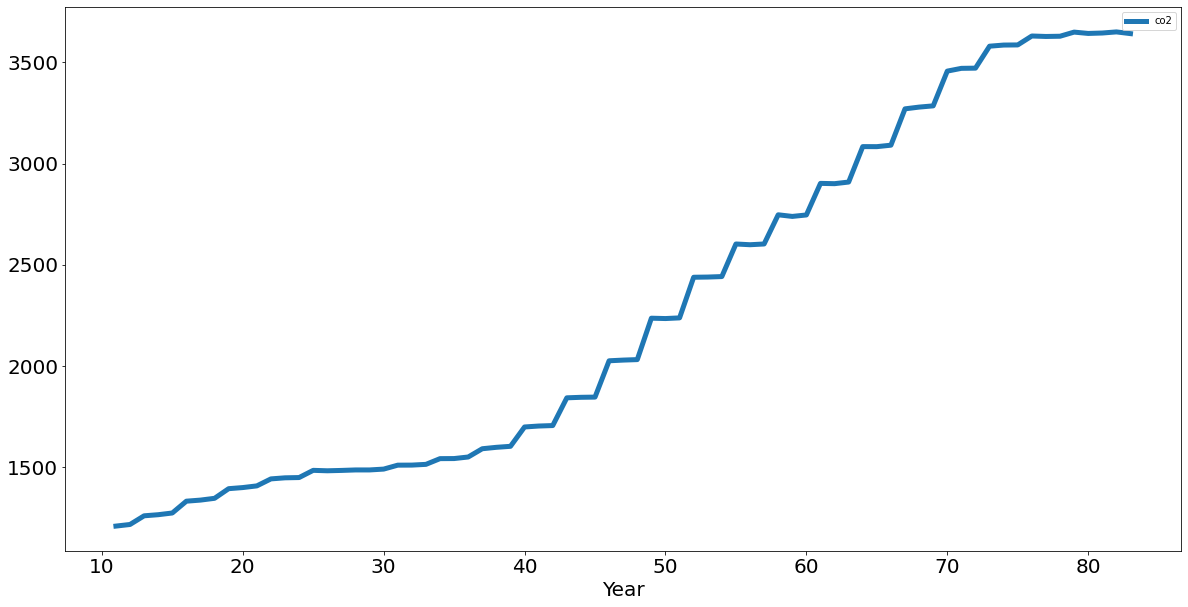

In [10]:
co2 = df[['co2']]
co2.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### 국가별 데이터 분리
중국

In [11]:
china = df[df['country']=='CHN']
korea = df[df['country']=='KOR']
japan = df[df['country']=='JPN']

gdp와 co2의 상관계수 :  0.96


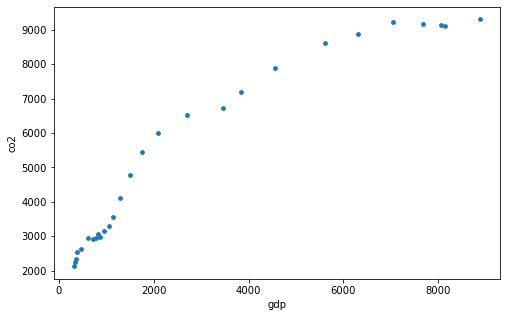

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
china.plot.scatter(x='gdp',
                     y='co2',s=14)

corr_gdp_with_co2 = round(china.corr().iloc[0,1],2)
print('gdp와 co2의 상관계수 : ',corr_gdp_with_co2)

일본

gdp와 co2의 상관계수 :  0.54


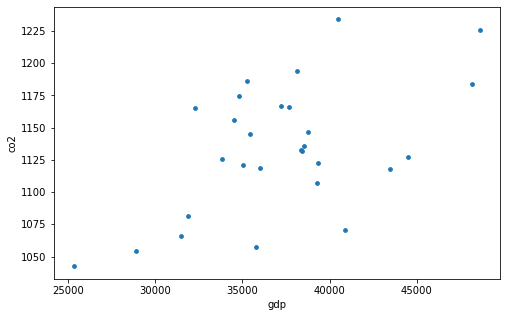

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
japan.plot.scatter(x='gdp',
                     y='co2',s=14)

corr_gdp_with_co2 = round(japan.corr().iloc[0,1],2)
print('gdp와 co2의 상관계수 : ',corr_gdp_with_co2)

gdp와 co2의 상관계수 :  0.94


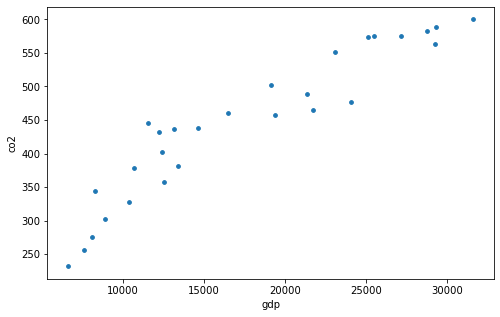

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
korea.plot.scatter(x='gdp',
                     y='co2',s=14)

corr_gdp_with_co2 = round(korea.corr().iloc[0,1],2)
print('gdp와 co2의 상관계수 : ',corr_gdp_with_co2)

#### 중국 3년 gdp,co2 이동평균

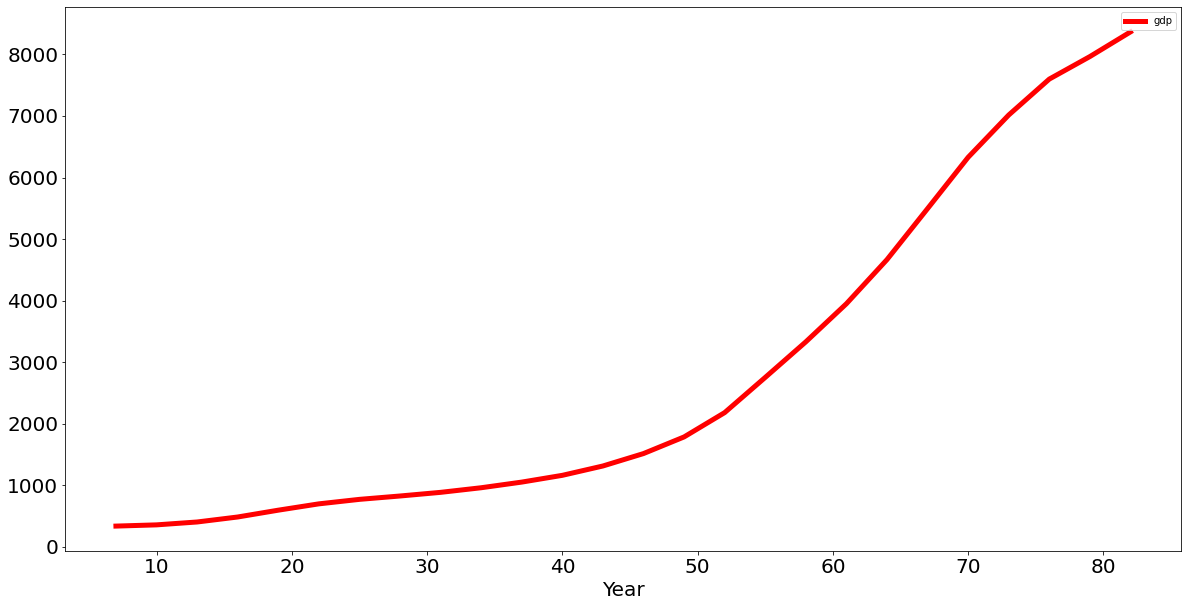

In [15]:
gdp = china[['gdp']]
gdp.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

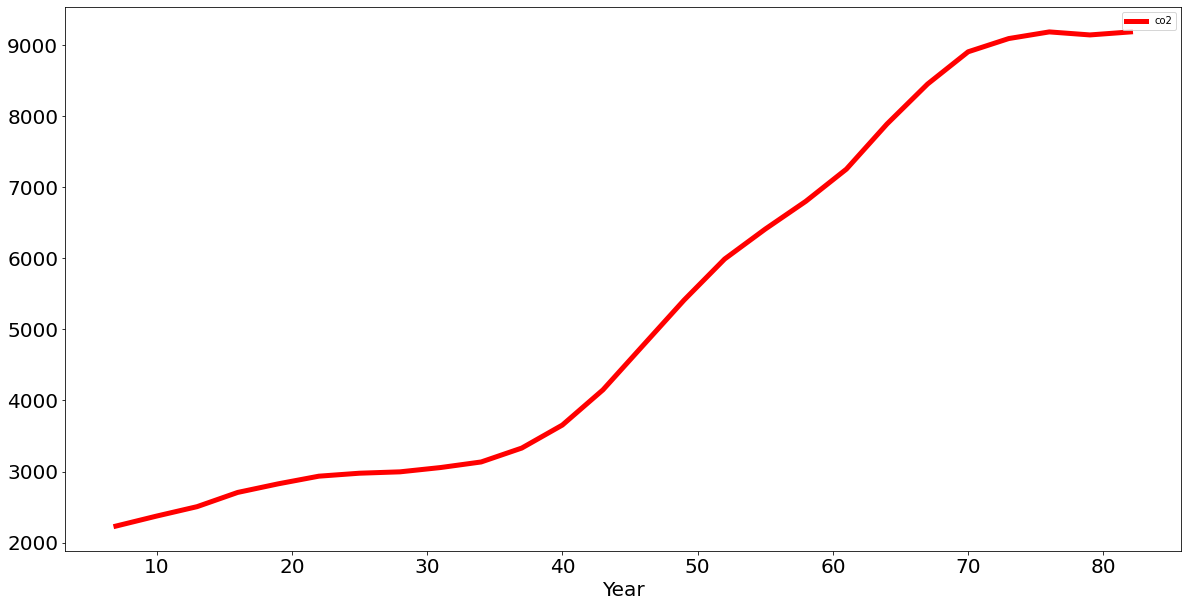

In [16]:
gdp = china[['co2']]
gdp.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

#### 일본 3년 gdp,co2 이동평균

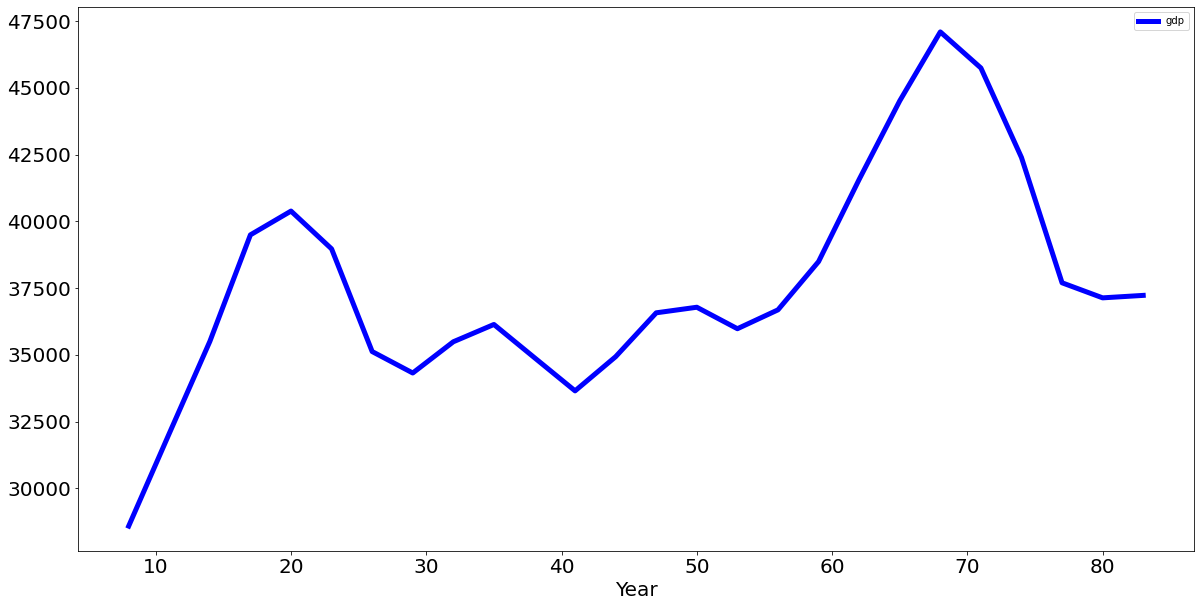

In [17]:
gdp = japan[['gdp']]
gdp.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='blue',)
plt.xlabel('Year', fontsize=20);

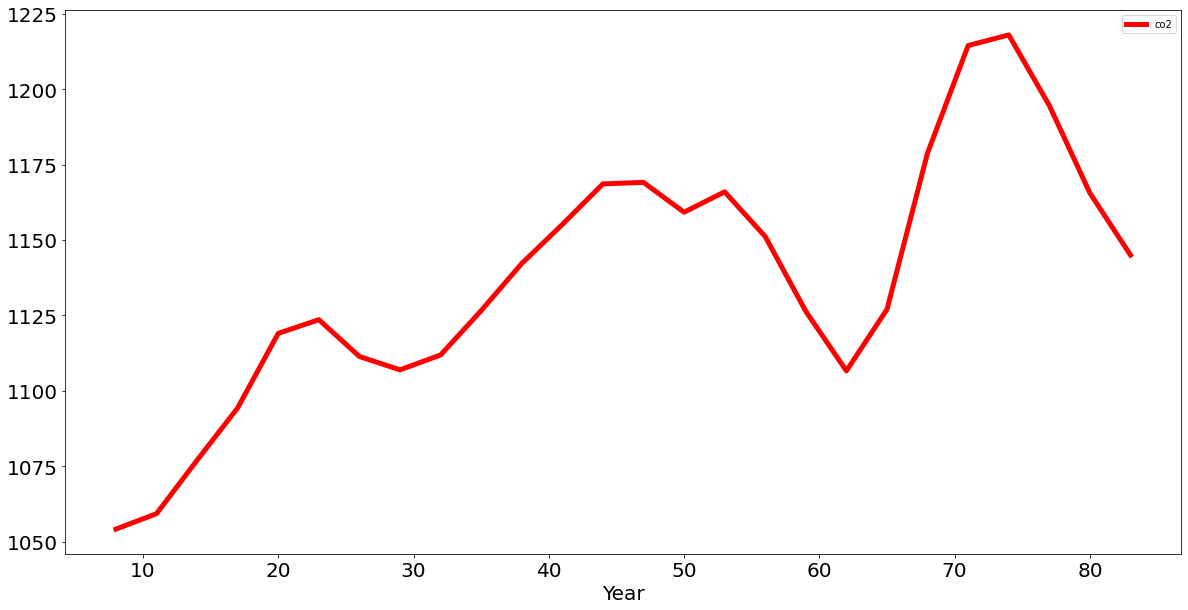

In [18]:
co2 = japan[['co2']]
co2.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

#### 한국 3년 gdp,co2 이동평균

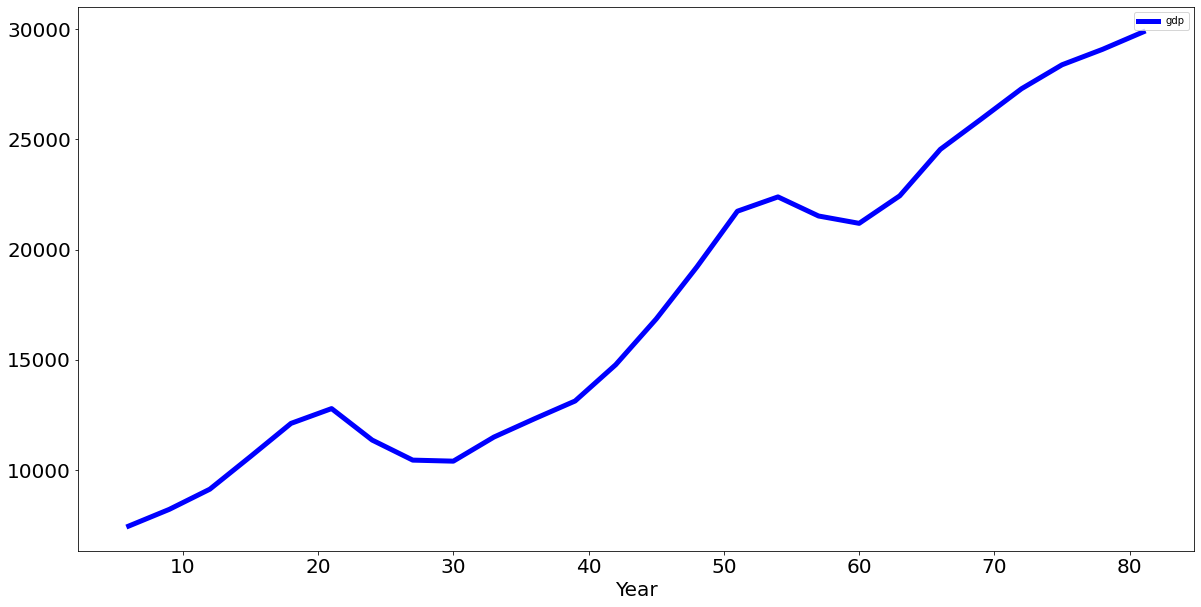

In [19]:
gdp = korea[['gdp']]
gdp.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='blue',)
plt.xlabel('Year', fontsize=20);

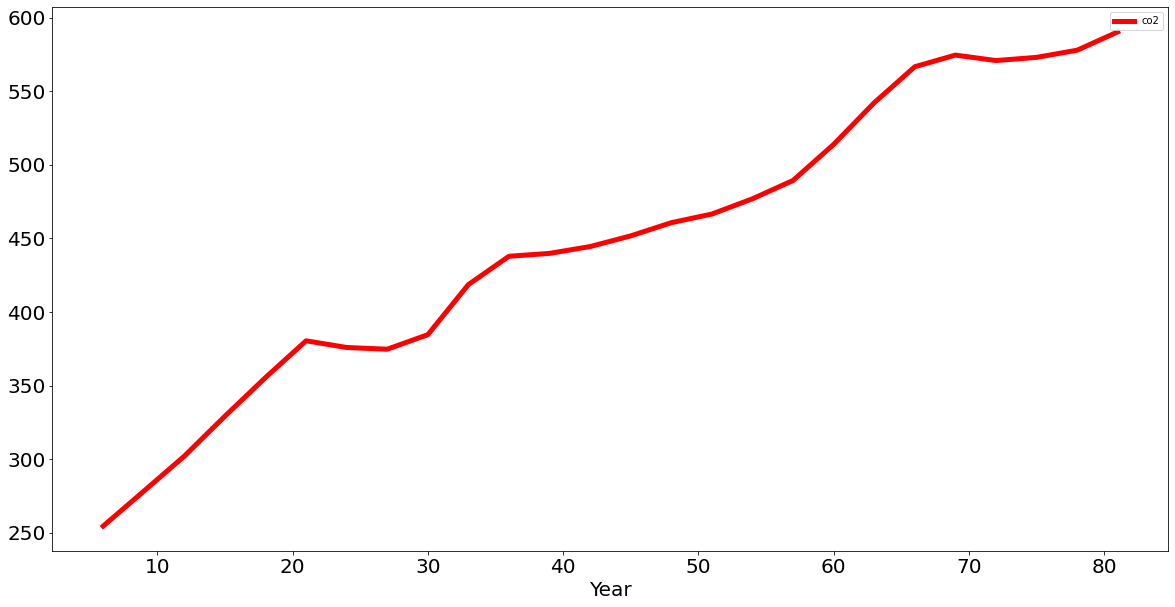

In [20]:
co2 = korea[['co2']]
co2.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

In [61]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

china_co2 = china.loc[:, 'co2']
china_co2 = china_co2.to_frame()

china.loc[:,'gdp_sq']=china.loc[:,'gdp']**2

china_gdp = china.loc[:, 'gdp']
china_gdp_sq = china.loc[:, 'gdp_sq']
x_china = pd.concat([china_gdp, china_gdp_sq],axis=1)
X_china = sm.add_constant(x_china)

y = china_co2

kuznets_china = sm.OLS(y, X_china)
kuznets_china_fit = kuznets_china.fit()
kuznets_china_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           3.12e-25
Time:                        17:50:33   Log-Likelihood:                -197.28
No. Observations:                  28   AIC:                             400.6
Df Residuals:                      25   BIC:                             404.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1632.1814    113.763     14.347      0.000    1397.881    1866.481
gdp            2.0220      0.088     22.990      0.000       1.841       2.203
gdp_sq        -0.0001   1.02e-05    -13.137      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        8.173   Durbin-Watson:                   0.586
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                6.638
Skew:                           1.151   Prob(JB):                       0.0362
Kurtosis:                       3.627   Cond. No.                     6.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
import warnings
warnings.filterwarnings("ignore")
japan_co2 = japan.loc[:, 'co2']
japan_co2 = japan_co2.to_frame()

japan.loc[:, 'gdp_sq'] = japan.loc[:, 'gdp'] **2

japan_gdp = japan.loc[:, 'gdp']
japan_gdp_sq = japan.loc[:, 'gdp_sq']
x_japan = pd.concat([japan_gdp, japan_gdp_sq],axis=1)
X_japan = sm.add_constant(x_japan)

y = japan_co2

kuznets_japan = sm.OLS(y, X_japan)
kuznets_japan_fit = kuznets_japan.fit()
kuznets_japan_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     5.647
Date:                Sun, 13 Dec 2020   Prob (F-statistic):            0.00947
Time:                        17:50:34   Log-Likelihood:                -143.32
No. Observations:                  28   AIC:                             292.6
Df Residuals:                      25   BIC:                             296.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        690.3685    291.087      2.372      0.026      90.864    1289.873
gdp            0.0187      0.015      1.211      0.237      -0.013       0.051
gdp_sq     -1.795e-07   2.04e-07     -0.880      0.387   -5.99e-07     2.4e-07
==============================================================================
Omnibus:                        0.203   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.410
Skew:                          -0.004   Prob(JB):                        0.815
Kurtosis:                       2.408   Cond. No.                     5.27e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
warnings.filterwarnings("ignore")

korea_co2 = korea.loc[:, 'co2']
korea_co2 = korea_co2.to_frame()

korea.loc[:, 'gdp_sq'] = korea.loc[:, 'gdp'] **2

korea_gdp = korea.loc[:, 'gdp']
korea_gdp_sq = korea.loc[:, 'gdp_sq']
x_korea = pd.concat([korea_gdp, korea_gdp_sq],axis=1)
X_korea = sm.add_constant(x_korea)

y = korea_co2

kuznets_korea = sm.OLS(y, X_korea)
kuznets_korea_fit = kuznets_korea.fit()
kuznets_korea_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     126.4
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           8.44e-14
Time:                        17:50:34   Log-Likelihood:                -136.76
No. Observations:                  28   AIC:                             279.5
Df Residuals:                      25   BIC:                             283.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.3705     42.885      2.364      0.026      13.047     189.694
gdp            0.0279      0.005      5.340      0.000       0.017       0.039
gdp_sq     -3.972e-07   1.38e-07     -2.878      0.008   -6.81e-07   -1.13e-07
==============================================================================
Omnibus:                        0.020   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.177
Skew:                           0.054   Prob(JB):                        0.915
Kurtosis:                       2.626   Cond. No.                     3.14e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 데이터 불러오기

In [60]:
# 1. 공업비중이 높아짐에따라 co2배출량 증가 
# 2. 정부효율성 지수가 높아짐에따라 co2배출량 감소

#정보 효율성지수
gov = pd.read_excel('./Data_Extract_From_Environment_Social_and_Governance_(ESG)_Data.xlsx')
#공업비중
dev = pd.read_excel('./Data_Extract_From_World_Development_Indicators.xlsx')

#co2
co2 = pd.read_excel('./1990-2017_한중일_CO2.xlsx')
co2_df = pd.melt(co2,id_vars=['국가별'])
co2_df.columns = ['country','year','co2']
co2_df['country'] = co2_df['country'].str.replace('중국','CHN')
co2_df['country'] = co2_df['country'].str.replace('일본','JPN')
co2_df['country'] = co2_df['country'].str.replace('한국','KOR')
co2_df['country'] = co2_df['country'].str[3:6]

### 데이터 형태 변경

In [22]:
def get_processing(df):
    df = df.iloc[:3,:]
    df = df.fillna(0)
    df = df.drop(columns=['Country Name','Series Code','Series Name'])
    df =df.melt(id_vars=['Country Code'])
    df.columns = ['country','year','value']
    df['year'] = df['year'].str[:4]
    return df

In [23]:
gov = get_processing(gov)
gov.columns = ['country','year','gov']
dev = get_processing(dev)
dev.columns = ['country','year','dev']

In [24]:
co2_dev = pd.merge(co2_df,dev,on=['country','year'])
co2_gov = pd.merge(co2_df,gov,on=['country','year'])

### 공업비중과 co2의 산포도 - 전체

공업비중과 co2의 상관계수 :  -0.63


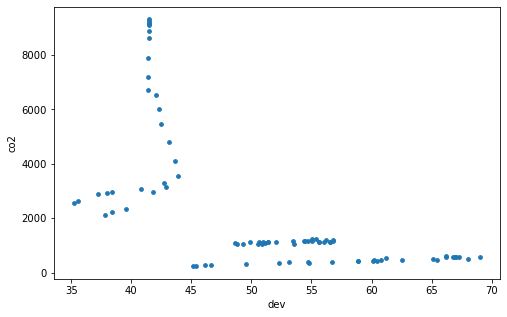

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
co2_dev.plot.scatter(x='dev',
                     y='co2',s=14)

corr_dev_with_co2 = round(co2_dev.corr().iloc[0,1],2)
print('공업비중과 co2의 상관계수 : ',corr_dev_with_co2)

공업비중이 높아짐에따라 co2배출량 증가 -> 공업비중이 높아짐에 따라 co2 감소
-> -0.63로 높은 음의 상관성을 가지고 있음

### 정부효율성 지수와 co2 산포도

정부효율성 지수와 co2의 상관계수 :  -0.37


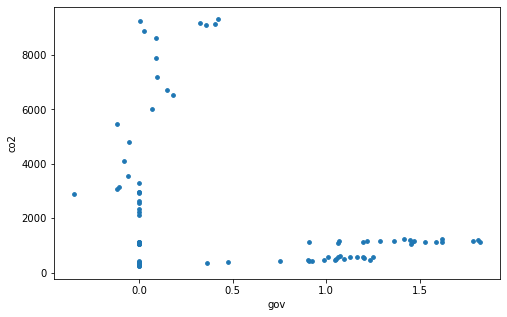

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
co2_gov.plot.scatter(x='gov',
                     y='co2',s=14)

corr_gov_with_co2 = round(co2_gov.corr().iloc[0,1],2)
print('정부효율성 지수와 co2의 상관계수 : ',corr_gov_with_co2)

정부효율성 지수가 높아짐에따라 co2배출량 감소

In [27]:
co2_gov.year = pd.to_datetime(co2_gov.year)
co2_dev.year = pd.to_datetime(co2_dev.year)
co2_df.year = pd.to_datetime(co2_df.year)
co2_df.set_index('year', inplace=True)
co2_gov.set_index('year', inplace=True)
co2_dev.set_index('year', inplace=True)

### 공업비중 12년 이동평균 - 전체

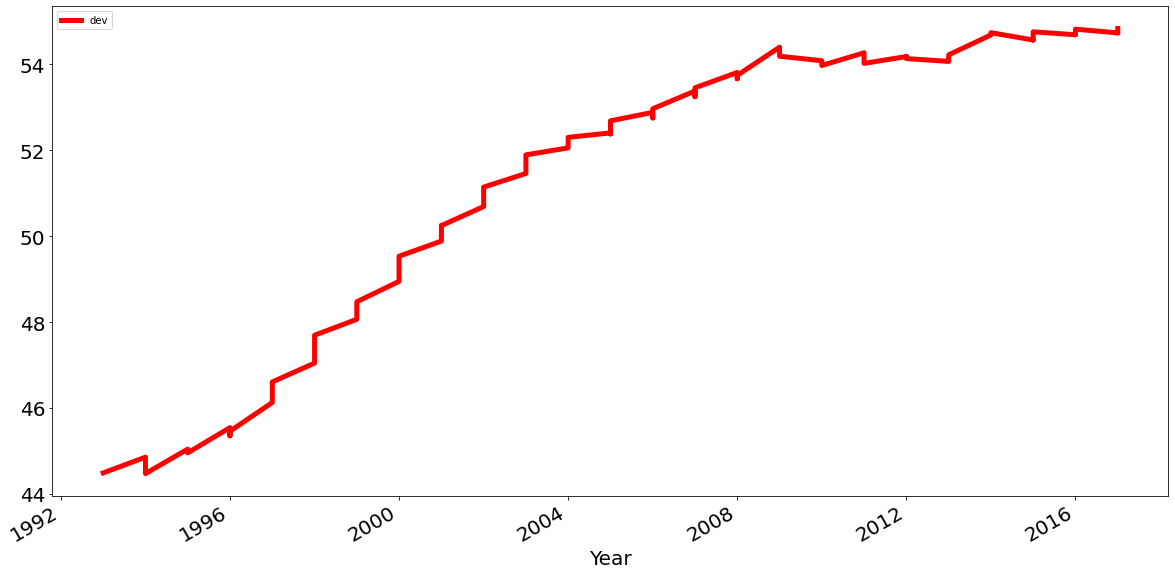

In [28]:
dev = co2_dev[['dev']]
dev.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

### 정부효율성 12년 이동평균 - 전체

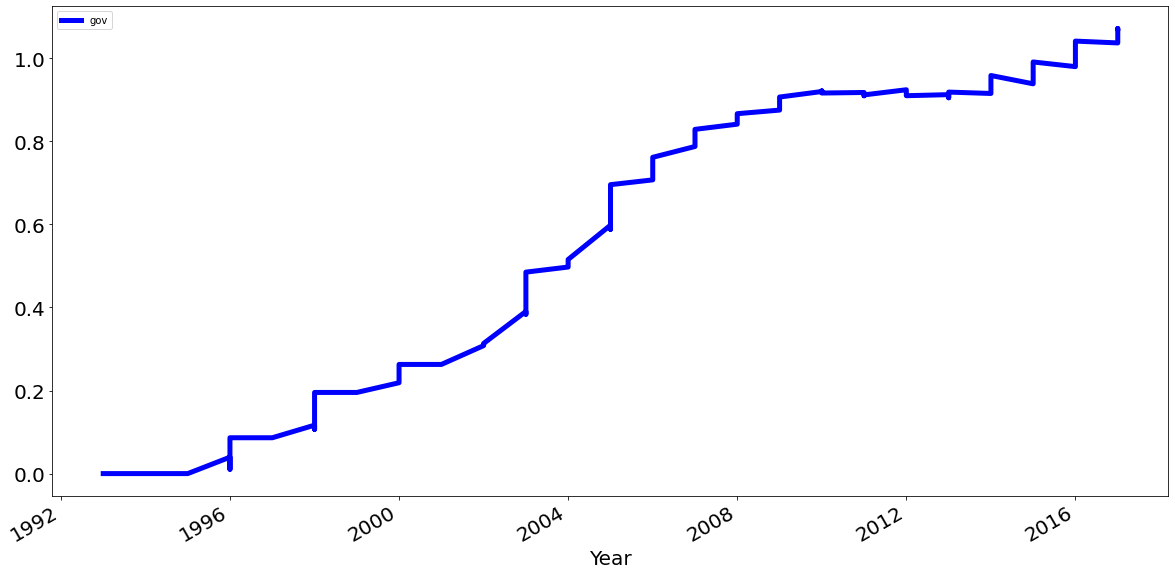

In [29]:
gov = co2_gov[co2_gov['gov']!=0].reset_index(drop=True)
gov = co2_gov[['gov']]
gov.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='blue',)
plt.xlabel('Year', fontsize=20);

### co2 12년 이동평균 - 전체

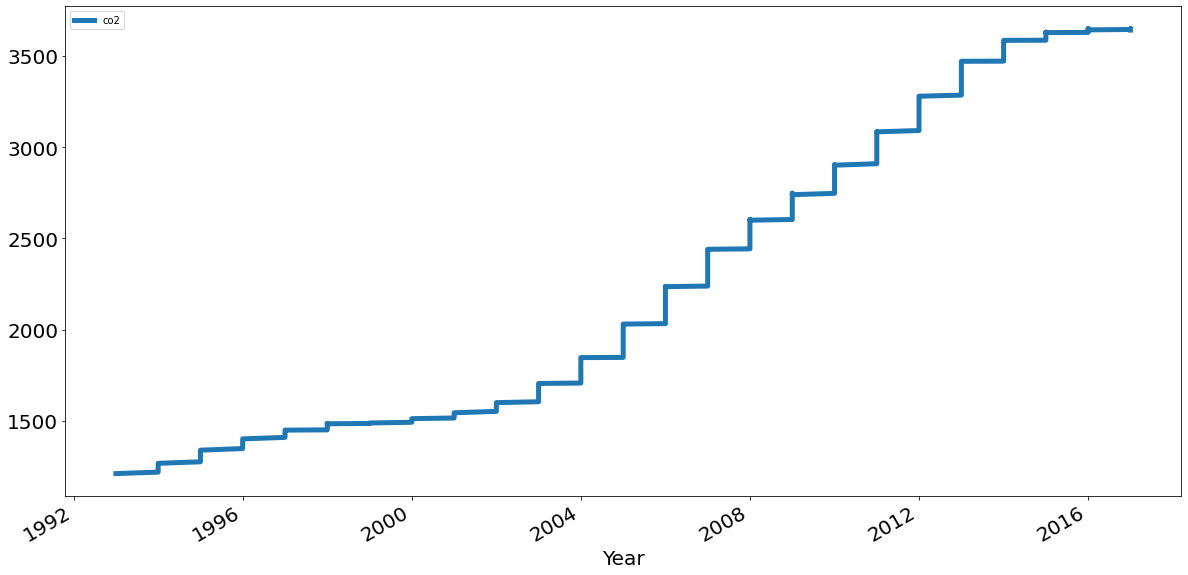

In [30]:
co2 = co2_df[['co2']]
co2.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### 국가별 데이터 분리
중국

In [31]:
co2_gov = co2_gov[co2_gov['gov']!=0].reset_index(drop=True)
china_gov = co2_gov[co2_gov['country']=='CHN']
korea_gov = co2_gov[co2_gov['country']=='KOR']
japan_gov = co2_gov[co2_gov['country']=='JPN']

# 0값 제거

china_dev = co2_dev[co2_dev['country']=='CHN']
korea_dev = co2_dev[co2_dev['country']=='KOR']
japan_dev = co2_dev[co2_dev['country']=='JPN']

중국 : 공업비중과 co2의 상관계수 :  0.44


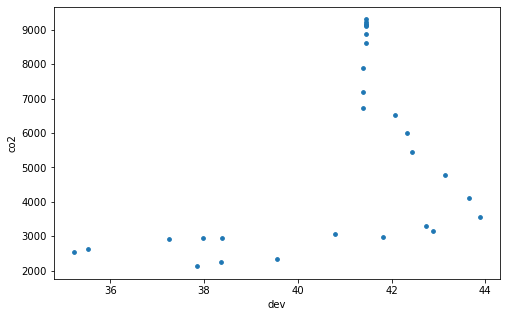

In [32]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
china_dev.plot.scatter(x='dev',
                     y='co2',s=14)

print('중국 : 공업비중과 co2의 상관계수 : ',round(china_dev.corr().iloc[0,1],2))

중국 : 정부효율성과 co2의 상관계수 :  0.8


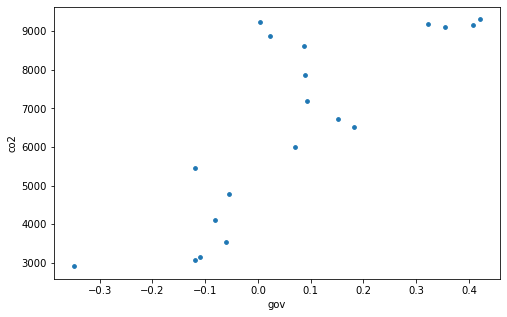

In [35]:
plt.rcParams["figure.figsize"] = [8, 5]
china_gov.plot.scatter(x='gov',
                     y='co2',s=14)

print('중국 : 정부효율성과 co2의 상관계수 : ',round(china_gov.corr().iloc[0,1],2))

일본

일본 : 공업비중과 co2의 상관계수 :  0.67


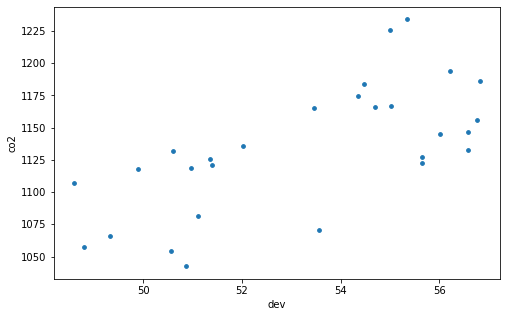

In [36]:
plt.rcParams["figure.figsize"] = [8, 5]
japan_dev.plot.scatter(x='dev',
                     y='co2',s=14)

print('일본 : 공업비중과 co2의 상관계수 : ',round(japan_dev.corr().iloc[0,1],2))

일본 : 정부효율성과 co2의 상관계수 :  0.25


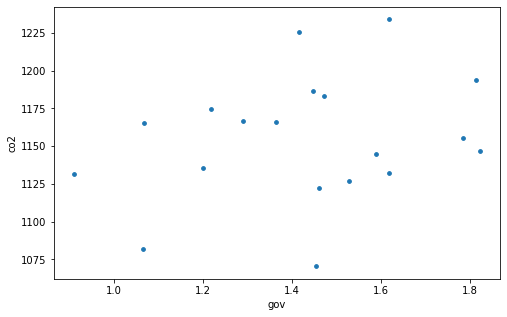

In [37]:
plt.rcParams["figure.figsize"] = [8, 5]
japan_gov.plot.scatter(x='gov',
                     y='co2',s=14)

print('일본 : 정부효율성과 co2의 상관계수 : ',round(japan_gov.corr().iloc[0,1],2))

한국

한국 : 공업비중과 co2의 상관계수 :  0.95


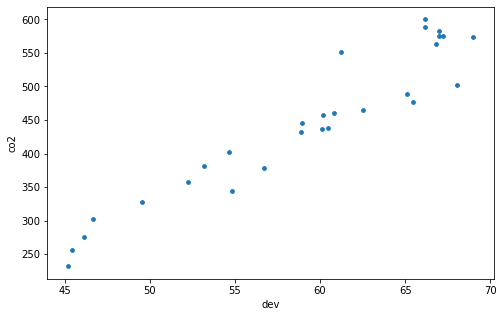

In [38]:
plt.rcParams["figure.figsize"] = [8, 5]
korea_dev.plot.scatter(x='dev',
                     y='co2',s=14)

print('한국 : 공업비중과 co2의 상관계수 : ',round(korea_dev.corr().iloc[0,1],2))

한국 : 정부효율성과 co2의 상관계수 :  0.8


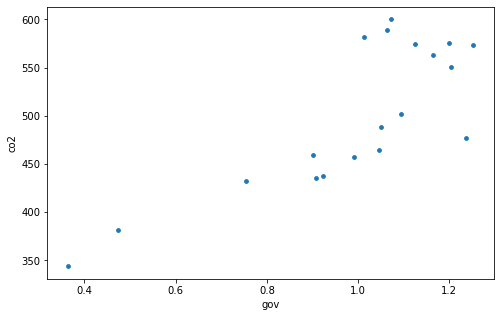

In [39]:
plt.rcParams["figure.figsize"] = [8, 5]
korea_gov.plot.scatter(x='gov',
                     y='co2',s=14)

print('한국 : 정부효율성과 co2의 상관계수 : ',round(korea_gov.corr().iloc[0,1],2))

전체적으로 두 개의 지수 모두 상관계수가 높음

### 데이터 다시 불러오기

In [41]:
import pandas as pd

# 1. 공업비중이 높아짐에따라 co2배출량 증가 
# 2. 정부효율성 지수가 높아짐에따라 co2배출량 감소

#정보 효율성지수
gov = pd.read_excel('./Data_Extract_From_Environment_Social_and_Governance_(ESG)_Data.xlsx')
#공업비중
dev = pd.read_excel('./Data_Extract_From_World_Development_Indicators.xlsx')

#co2
co2 = pd.read_excel('./1990-2017_한중일_CO2.xlsx')
co2_df = pd.melt(co2,id_vars=['국가별'])
co2_df.columns = ['country','year','co2']
co2_df['country'] = co2_df['country'].str.replace('중국','CHN')
co2_df['country'] = co2_df['country'].str.replace('일본','JPN')
co2_df['country'] = co2_df['country'].str.replace('한국','KOR')
co2_df['country'] = co2_df['country'].str[3:6]

def get_processing(df):
    df = df.iloc[:3,:]
    df = df.fillna(0)
    df = df.drop(columns=['Country Name','Series Code','Series Name'])
    df =df.melt(id_vars=['Country Code'])
    df.columns = ['country','year','value']
    df['year'] = df['year'].str[:4]
    return df
gov = get_processing(gov)
gov.columns = ['country','year','gov']
dev = get_processing(dev)
dev.columns = ['country','year','dev'] 

In [42]:
co2_dev = pd.merge(co2_df,dev,on=['country','year'])
co2_gov = pd.merge(co2_df,gov,on=['country','year'])
co2_gov = co2_gov[co2_gov['gov']!=0].reset_index(drop=True)

In [43]:
co2_gov.year = pd.to_datetime(co2_gov.year)
co2_dev.year = pd.to_datetime(co2_dev.year)
co2_df.year = pd.to_datetime(co2_df.year)
co2_df.set_index('year', inplace=True)
co2_gov.set_index('year', inplace=True)
co2_dev.set_index('year', inplace=True)

In [44]:
china_gov = co2_gov[co2_gov['country']=='CHN']
japan_gov = co2_gov[co2_gov['country']=='JPN']
korea_gov = co2_gov[co2_gov['country']=='KOR']

china_dev = co2_dev[co2_dev['country']=='CHN']
japan_dev = co2_dev[co2_dev['country']=='JPN']
korea_dev = co2_dev[co2_dev['country']=='KOR']

In [45]:
china_co2 = co2_df[co2_df['country']=='CHN']
japan_co2 = co2_df[co2_df['country']=='JPN']
korea_co2 = co2_df[co2_df['country']=='KOR']

### 중국 3년 정보효율성 이동평균

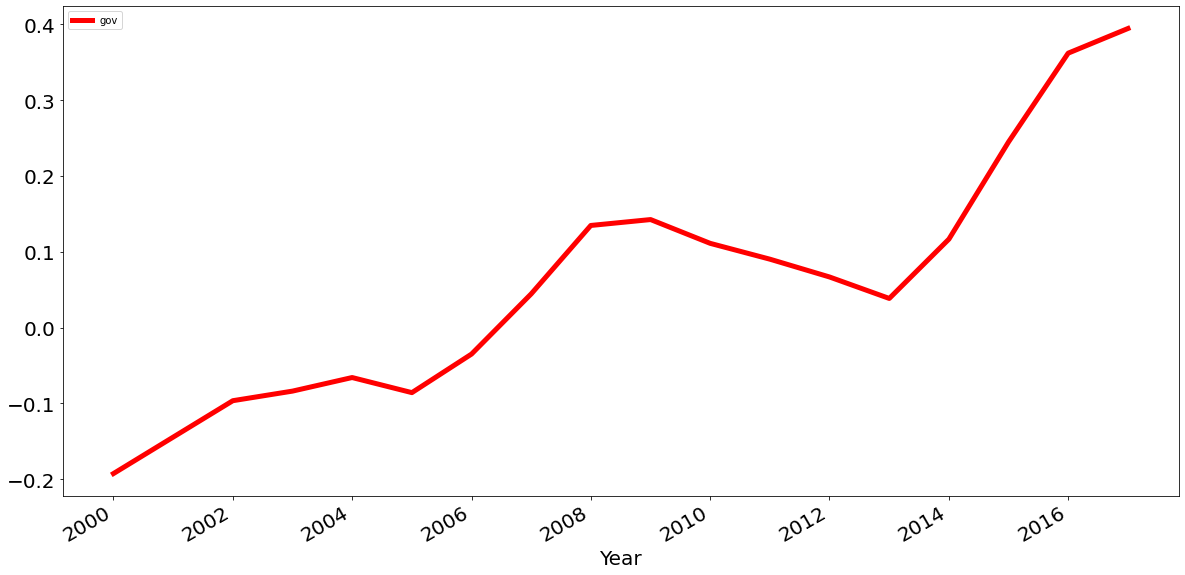

In [46]:
gov = china_gov[['gov']]
gov.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

### 중국 3년 co2 이동평균

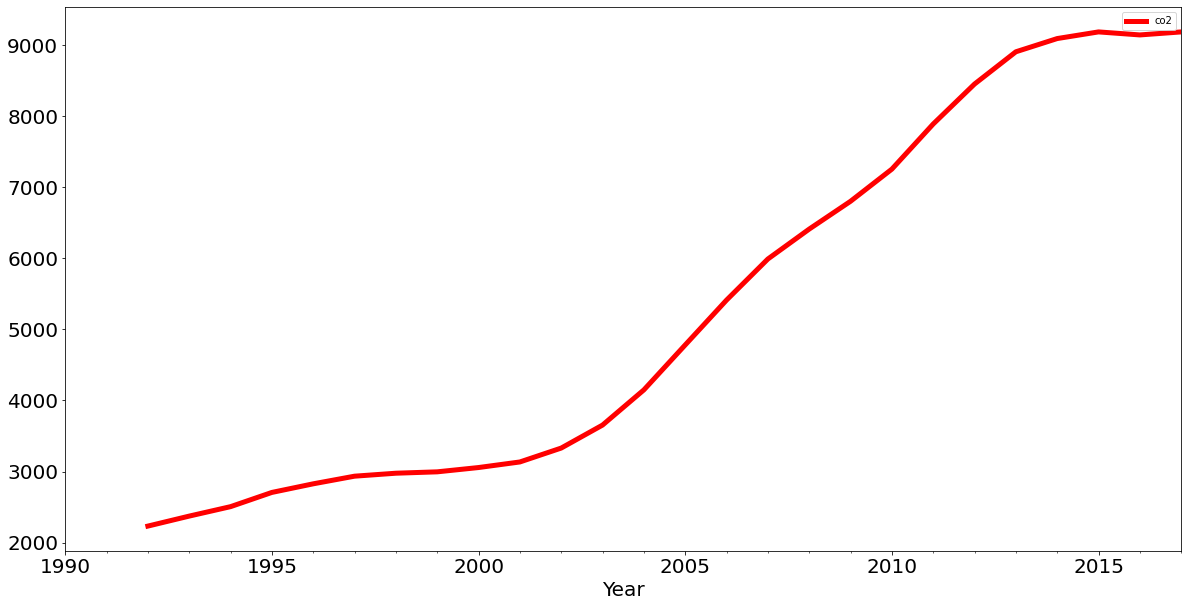

In [48]:
co2 = china_dev[['co2']]
co2.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

### 일본  3년 공업비중 이동평균

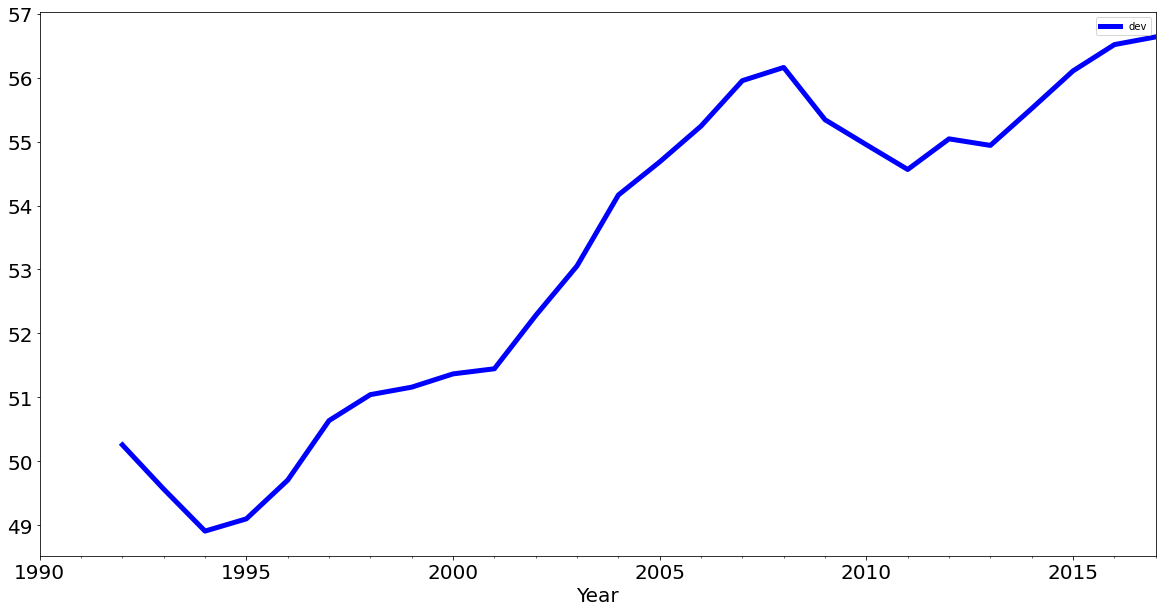

In [49]:
dev = japan_dev[['dev']]
dev.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='blue',)
plt.xlabel('Year', fontsize=20);

### 일본 3년 정부효율성 이동평균

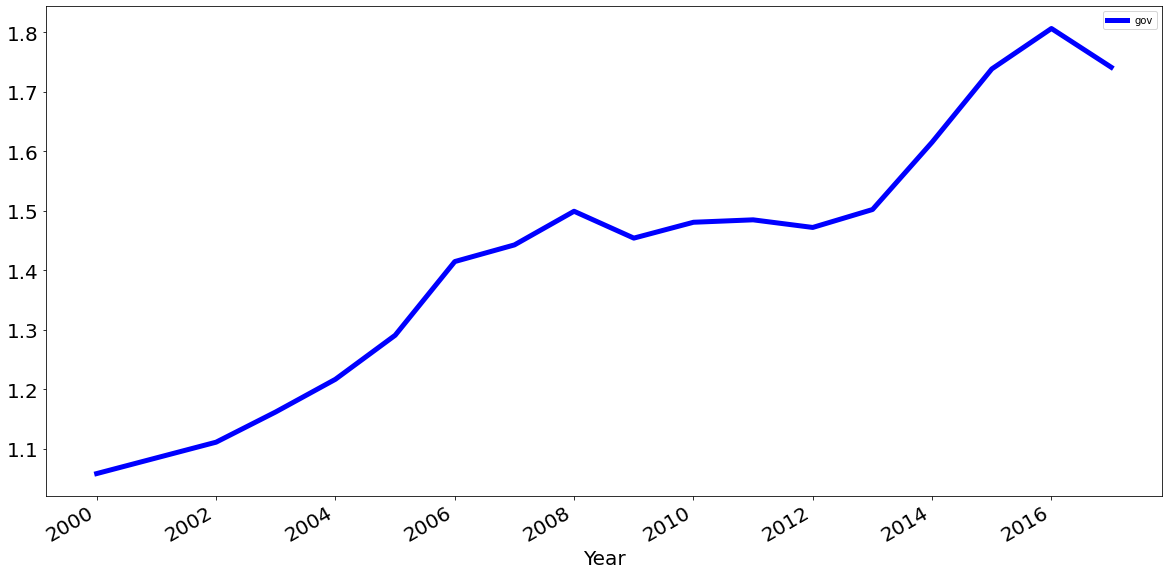

In [47]:
gov = japan_gov[['gov']]
gov.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='blue',)
plt.xlabel('Year', fontsize=20);

### 일본 3년 co2 이동평균

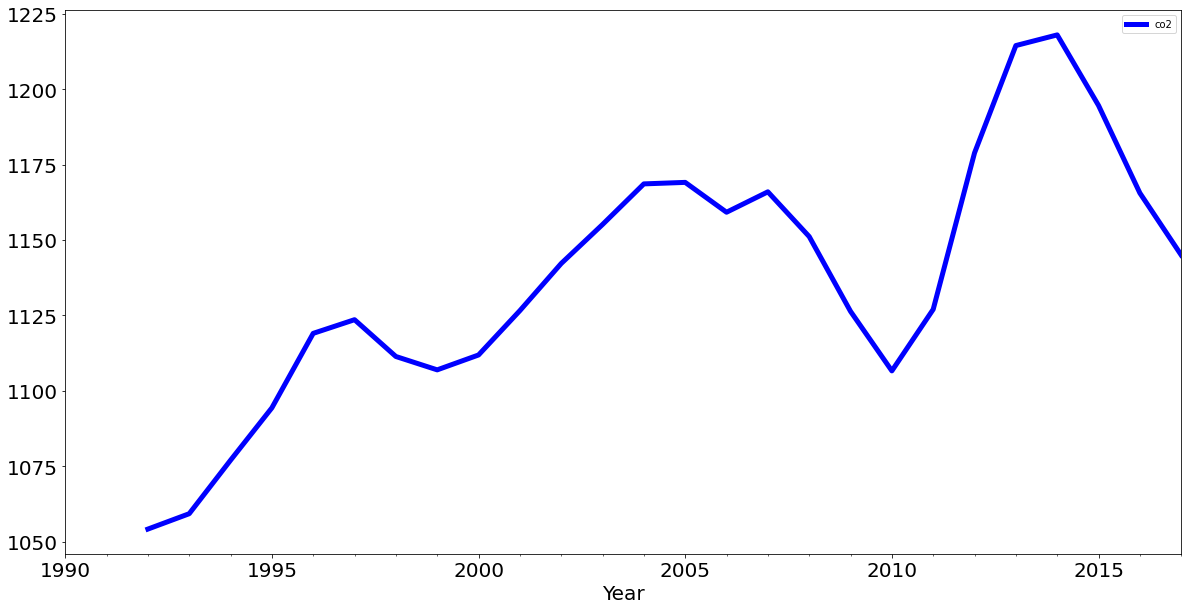

In [51]:
co2 = japan_dev[['co2']]
co2.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='blue',)
plt.xlabel('Year', fontsize=20);

### 한국  3년 공업비중 이동평균

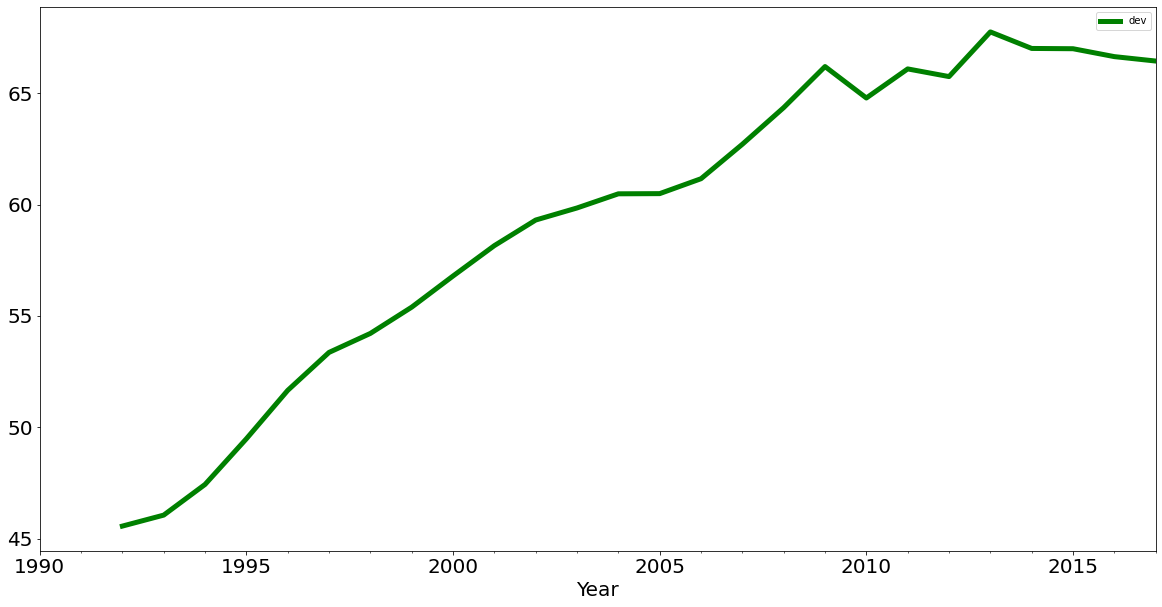

In [52]:
dev = korea_dev[['dev']]
dev.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='green',)
plt.xlabel('Year', fontsize=20);

### 한국  3년 정부효율성 이동평균

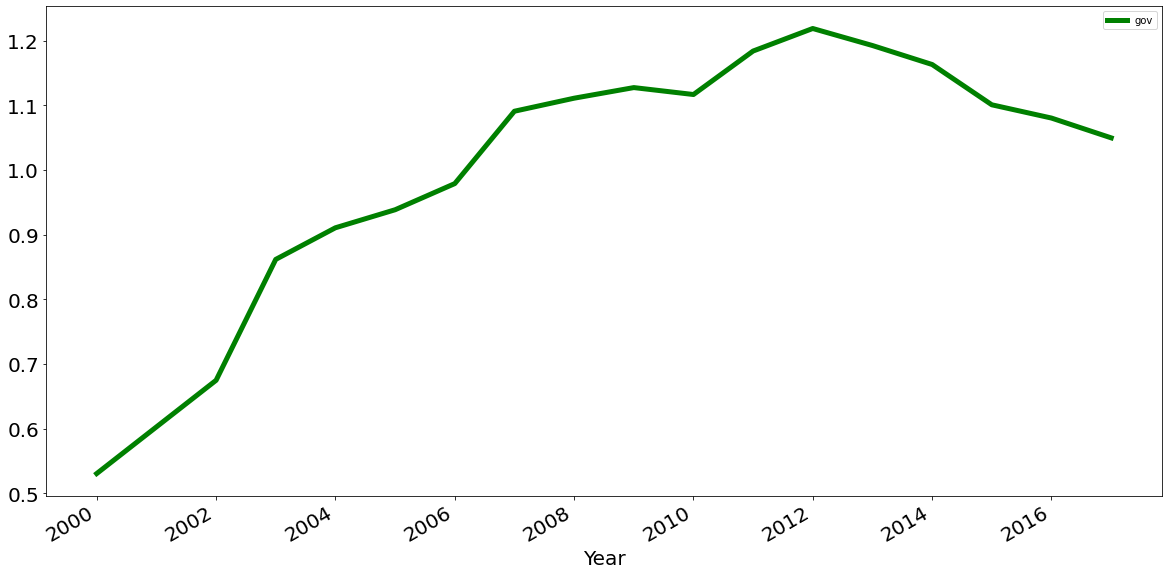

In [54]:
gov = korea_gov[['gov']]
gov.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='green',)
plt.xlabel('Year', fontsize=20);

### 한국  3년 co2 이동평균

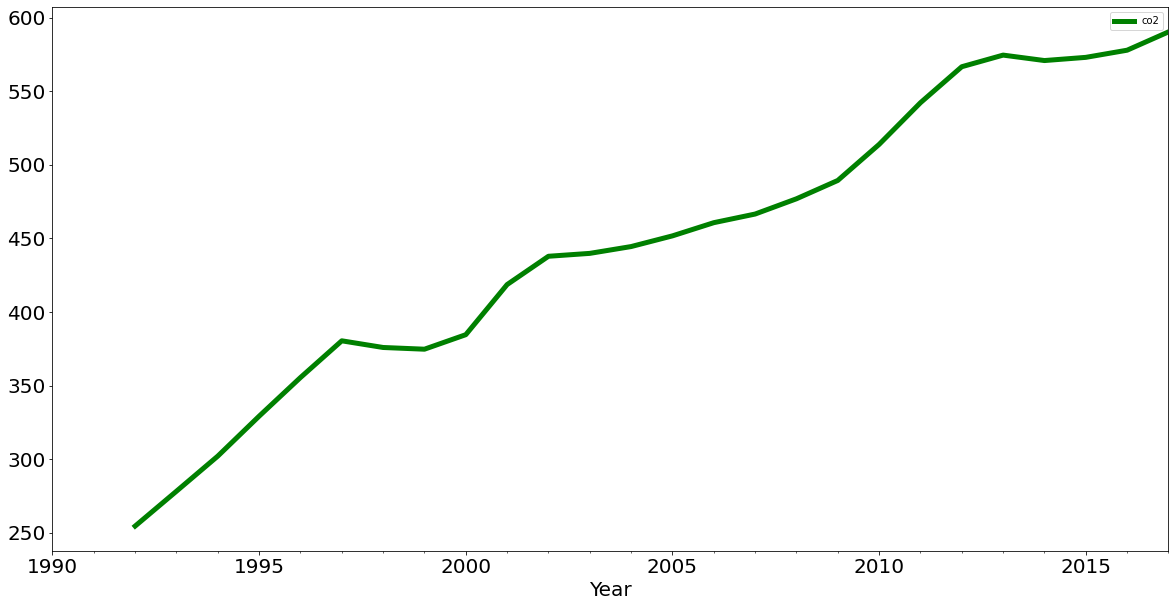

In [55]:
co2 = korea_dev[['co2']]
co2.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='green',)
plt.xlabel('Year', fontsize=20);

In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

gdp = pd.read_excel('./GDP_country.xlsx')

co2 = pd.read_excel('./CO2_country.xlsx')
no2 = pd.read_excel('./NO2_country.xlsx')
met = pd.read_excel('./Methane_country.xlsx')
popul = pd.read_excel('./Population_country.xlsx')

ind = pd.read_excel('./Industry_country.xlsx')
indP = pd.read_excel('./Medium & High percentage_country.xlsx')
govef = pd.read_excel('./Government effectiveness_country.xlsx')
death = pd.read_excel('./mortality_country.xlsx')

In [4]:
popul_world = pd.concat([popul.iloc[:-5, 2:3], popul.iloc[:-5, -1:]], axis=1)
popul_world.columns = ["Country", "pop."]
popul_world = popul_world.set_index("Country")

gdp_world = pd.concat([gdp.iloc[:-5, 2:3], gdp.iloc[:-5, -1:]], axis=1)
gdp_world.columns = ["Country", "gdp"]
gdp_world = gdp_world.set_index("Country")

gdp_world_sq = gdp_world.loc[:, "gdp"] ** 2
gdp_world_sq = gdp_world_sq.to_frame()
gdp_world_sq.columns = ["gdp_sq"]

gdp_world_cu = gdp_world.loc[:, "gdp"] ** 3
gdp_world_cu = gdp_world_cu.to_frame()
gdp_world_cu.columns = ["gdp_cu"]

# CO2
### $CO2/pop. = gdp + gdp^{2}$

In [5]:
co2_world = pd.concat([co2.iloc[:-5, 2:3], co2.iloc[:-5,-1:]], axis=1)
co2_world.columns = ["Country", "co2"]
co2_world = co2_world.set_index("Country")

y = co2_world.loc[:, 'co2'] / popul_world.loc[:, 'pop.']
y = y.to_frame()
y.columns = ['co2']

x_gdp = pd.concat([gdp_world, gdp_world_sq], axis = 1)
X_gdp = sm.add_constant(x_gdp)

kuznets = sm.OLS(y, X_gdp.astype(float), missing='drop')

kuznets.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     63.13
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           7.26e-22
Time:                        02:21:38   Log-Likelihood:                 762.85
No. Observations:                 198   AIC:                            -1520.
Df Residuals:                     195   BIC:                            -1510.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      2.053      0.041    4.14e-05       0.002
gdp         3.705e-07   3.75e-08      9.871      0.000    2.96e-07    4.45e-07
gdp_sq     -2.524e-12   3.83e-13     -6.596      0.000   -3.28e-12   -1.77e-12
==============================================================================
Omnibus:                      162.262   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2116.550
Skew:                           3.108   Prob(JB):                         0.00
Kurtosis:                      17.762   Cond. No.                     3.27e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

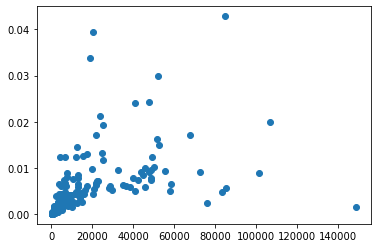

In [6]:
co2_array = y.iloc[:, 0:].values
gdp_array = gdp_world.iloc[:, 0:].values

plt.scatter(gdp_array, co2_array, marker = 'o')

# NO2
### $NO2/pop. = gdp + gdp^{2}$

In [7]:
no2_world = pd.concat([no2.iloc[:-5, 2:3], no2.iloc[:-5,-1:]], axis=1)
no2_world.columns = ["Country", "no2"]
no2_world = no2_world.set_index("Country")

y = no2_world.loc[:, 'no2'] / popul_world.loc[:, 'pop.']
y = y.to_frame()
y.columns = ['no2']

kuznets = sm.OLS(y, X_gdp.astype(float), missing='drop')

kuznets.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    no2   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1413
Date:                Mon, 14 Dec 2020   Prob (F-statistic):              0.868
Time:                        02:22:12   Log-Likelihood:                 972.21
No. Observations:                 196   AIC:                            -1938.
Df Residuals:                     193   BIC:                            -1929.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      3.913      0.000       0.000       0.001
gdp        -8.441e-09   1.59e-08     -0.531      0.596   -3.98e-08    2.29e-08
gdp_sq      1.014e-13   2.02e-13      0.501      0.617   -2.98e-13    5.01e-13
==============================================================================
Omnibus:                      391.539   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167314.377
Skew:                          11.264   Prob(JB):                         0.00
Kurtosis:                     144.351   Cond. No.                     2.60e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

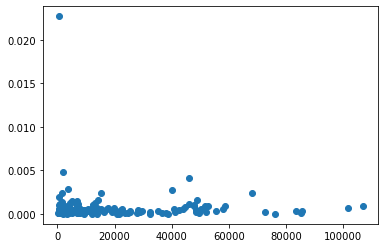

In [8]:
no2_array = y.iloc[:, 0:].values
gdp_array = gdp_world.iloc[:, 0:].values

plt.scatter(gdp_array, no2_array, marker = 'o')

### Central African Republic이 Outlier로 나타나서 삭제 후 다시 회귀(y >= 0.02)

In [9]:
y_CAR = y.drop(['Central African Republic'])
X_gdp_CAR = X_gdp.drop(['Central African Republic'])

kuznets = sm.OLS(y_CAR, X_gdp_CAR.astype(float), missing='drop')
kuznets_fit = kuznets.fit()
kuznets_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    no2   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9940
Date:                Mon, 14 Dec 2020   Prob (F-statistic):              0.372
Time:                        02:22:14   Log-Likelihood:                 1162.8
No. Observations:                 195   AIC:                            -2320.
Df Residuals:                     192   BIC:                            -2310.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005   6.62e-05      7.039      0.000       0.000       0.001
gdp         5.131e-09   5.84e-09      0.878      0.381   -6.39e-09    1.67e-08
gdp_sq     -3.046e-14   7.44e-14     -0.410      0.683   -1.77e-13    1.16e-13
==============================================================================
Omnibus:                      177.018   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2683.183
Skew:                           3.536   Prob(JB):                         0.00
Kurtosis:                      19.739   Cond. No.                     2.61e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

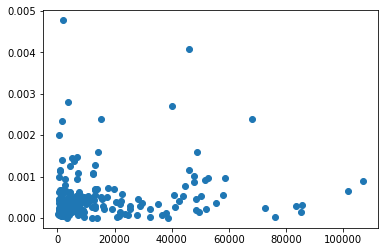

In [10]:
no2_array_CAR = y_CAR.iloc[:, 0:].values
gdp_array_CAR = X_gdp_CAR.loc[:, 'gdp'].values

plt.scatter(gdp_array_CAR, no2_array_CAR, marker = 'o')

# Methane
### $methane/pop. = gdp + gdp^{2}$

In [11]:
met_world = pd.concat([met.iloc[:-5, 2:3], met.iloc[:-5,-1:]], axis=1)
met_world.columns = ["Country", "met"]
met_world = met_world.set_index("Country")

y = met_world.loc[:, 'met'] / popul_world.loc[:, 'pop.']
y = y.to_frame()
y.columns = ['met']

kuznets = sm.OLS(y, X_gdp.astype(float), missing='drop')
kuznets.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    met   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     5.612
Date:                Mon, 14 Dec 2020   Prob (F-statistic):            0.00428
Time:                        02:22:41   Log-Likelihood:                 912.85
No. Observations:                 195   AIC:                            -1820.
Df Residuals:                     192   BIC:                            -1810.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.000      4.847      0.000       0.001       0.002
gdp         1.275e-08   2.12e-08      0.602      0.548    -2.9e-08    5.45e-08
gdp_sq      1.752e-13   2.69e-13      0.651      0.516   -3.55e-13    7.06e-13
==============================================================================
Omnibus:                      239.584   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9918.145
Skew:                           5.142   Prob(JB):                         0.00
Kurtosis:                      36.391   Cond. No.                     2.60e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

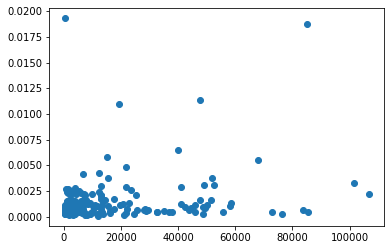

In [12]:
met_array = y.iloc[:, 0:].values
gdp_array = gdp_world.iloc[:, 0:].values

plt.scatter(gdp_array, met_array, marker = 'o')

# Government effectiveness?

In [13]:
ind_world = pd.concat([ind.iloc[:-5, 2:3], ind.iloc[:-5, -1:]], axis=1)
ind_world.columns = ["Country", "ind"]
ind_world = ind_world.set_index("Country")

indP_world = pd.concat([indP.iloc[:-5, 2:3], indP.iloc[:-5, -1:]], axis=1)
indP_world.columns = ["Country", "indP"]
indP_world = indP_world.set_index("Country")

govef_world = pd.concat([govef.iloc[:-5, 0:1], govef.iloc[:-5, -1:]], axis=1)
govef_world.columns = ["Country", "govef"]
govef_world = govef_world.set_index("Country")

death_world = pd.concat([death.iloc[:-5, 0:1], death.iloc[:-5, -1:]], axis=1)
death_world.columns = ["Country", "mortality"]
death_world = death_world.set_index("Country")

In [14]:
X_gdp_add = pd.concat([X_gdp, govef_world, indP_world], axis=1)

y_add = y
if 'govef' in X_gdp_add.columns.to_list():
    y_add = pd.concat([y, govef_world], axis=1)
    y_add = y_add.drop("govef", axis = 1)
    
sm.OLS(y_add, X_gdp_add, missing = 'drop').fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    met   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     5.329
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           0.000502
Time:                        02:23:36   Log-Likelihood:                 672.83
No. Observations:                 146   AIC:                            -1336.
Df Residuals:                     141   BIC:                            -1321.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.290      0.772      -0.001       0.001
gdp         1.259e-07   4.12e-08      3.053      0.003    4.44e-08    2.07e-07
gdp_sq     -6.823e-13   3.96e-13     -1.723      0.087   -1.47e-12    1.01e-13
govef         -0.0014      0.000     -3.266      0.001      -0.002      -0.001
indP        2.405e-06   1.49e-05      0.161      0.872   -2.71e-05    3.19e-05
==============================================================================
Omnibus:                      167.338   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4110.470
Skew:                           4.359   Prob(JB):                         0.00
Kurtosis:                      27.488   Cond. No.                     5.86e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 비교를 위해 Missing value 제거

In [17]:
a = indP_world.dropna()
a = a.index
a = a.to_list()

b = gdp_world.dropna()
b = b.index
b = b.to_list()

In [18]:
c = []
for i in b:
    if i not in a:
        c.append(i)
for i in a:
    if i not in b:
        c.append(i)

In [19]:
X_gdp_adjusted = X_gdp
y_adjusted = y
for x in c:
    if x in X_gdp_adjusted.index.to_list():
        X_gdp_adjusted = X_gdp_adjusted.drop([x])
    else:
        X_gdp_adjusted.loc[x, :] = np.nan
        
    if x in y_adjusted.index.to_list():
        y_adjusted = y_adjusted.drop([x])       
    else:
        y_adjusted.loc[x, :] = np.nan  

In [20]:
sm.OLS(y_adjusted, X_gdp_adjusted, missing = 'drop').fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    met   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.839
Date:                Mon, 14 Dec 2020   Prob (F-statistic):            0.00926
Time:                        02:24:28   Log-Likelihood:                 667.34
No. Observations:                 146   AIC:                            -1329.
Df Residuals:                     143   BIC:                            -1320.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.000      3.712      0.000       0.001       0.002
gdp         2.398e-08   2.64e-08      0.908      0.365   -2.82e-08    7.62e-08
gdp_sq      7.009e-14   3.24e-13      0.216      0.829    -5.7e-13    7.11e-13
==============================================================================
Omnibus:                      177.947   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5087.624
Skew:                           4.752   Prob(JB):                         0.00
Kurtosis:                      30.313   Cond. No.                     2.96e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""